In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from scipy import stats

from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [ ]:
a1 = 3
an = 99
n = 30
soma = (a1 + an) * (n / 2)
soma

1530.0

In [ ]:
total = []

for i in range(5000):
    a1 = randint(1,300)
    an = randint(a1+10,300+10)
    n = randint(1, (an-a1))
    a1n = a1 * n
    ann = an * n
    a1divn = a1 / n
    andivn = an / n
    soma = (a1 + an) * (n / 2)
    total.append([a1, an, n, a1n, ann, a1divn, andivn, soma])

df = pd.DataFrame(total, columns=['a1', 'an', 'n', 'a1n', 'ann', 'a1divn', 'andivn', 'y'])
df

,a1,an,n,a1n,ann,a1divn,andivn,y
0,186,254,1,186,254,186.000000,254.000000,220.0
1,67,298,164,10988,48872,0.408537,1.817073,29930.0
2,196,223,5,980,1115,39.200000,44.600000,1047.5
3,126,270,32,4032,8640,3.937500,8.437500,6336.0
4,91,120,25,2275,3000,3.640000,4.800000,2637.5
...,...,...,...,...,...,...,...,...
4995,253,292,34,8602,9928,7.441176,8.588235,9265.0
4996,269,305,17,4573,5185,15.823529,17.941176,4879.0
4997,162,271,10,1620,2710,16.200000,27.100000,2165.0
4998,207,264,15,3105,3960,13.800000,17.600000,3532.5


In [ ]:
df = df[df.y - df.y.astype(int) == 0]
df

,a1,an,n,a1n,ann,a1divn,andivn,y
0,186,254,1,186,254,186.000000,254.000000,220.0
1,67,298,164,10988,48872,0.408537,1.817073,29930.0
3,126,270,32,4032,8640,3.937500,8.437500,6336.0
5,193,215,14,2702,3010,13.785714,15.357143,2856.0
6,148,193,10,1480,1930,14.800000,19.300000,1705.0
...,...,...,...,...,...,...,...,...
4994,79,159,30,2370,4770,2.633333,5.300000,3570.0
4995,253,292,34,8602,9928,7.441176,8.588235,9265.0
4996,269,305,17,4573,5185,15.823529,17.941176,4879.0
4997,162,271,10,1620,2710,16.200000,27.100000,2165.0


In [ ]:
#X = df[['a1', 'an', 'n', 'a1n', 'ann', 'a1divn', 'andivn']].to_numpy()
X = df[['a1', 'an', 'n']].to_numpy()
y = df['y']
print(len(X))
print(len(y))

3720
3720


In [ ]:
#tuplas = [[0,1], [1,3], [2,5], [3,7], [4,9], [5,11]]

#tuplas = [[1, 100, 100, 5050], [10 ,30, 5, 100], [3, 99, 30, 1530]]

df = pd.DataFrame(tuplas, columns=['a1', 'an', 'n', 'y'])
X = df[['a1', 'an', 'n']].to_numpy()
y = df['y']

print(df)
print(X)
print(y)

   a1   an    n     y
0   1  100  100  5050
1  10   30    5   100
2   3   99   30  1530
[[  1 100 100]
 [ 10  30   5]
 [  3  99  30]]
0    5050
1     100
2    1530
Name: y, dtype: int64


In [ ]:
reg = LinearRegression().fit(X, y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=5)

In [ ]:
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.8, random_state=0)

In [ ]:
xgb_reg = xgb.XGBRegressor(n_estimators=1000, max_depth=20).fit(X_train, y_train, eval_set=[(X_val,y_val)], eval_metric = 'rmse')
xgb_reg

[01:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9307.93
[1]	validation_0-rmse:8400.78
[2]	validation_0-rmse:7579.64
[3]	validation_0-rmse:6850.23
[4]	validation_0-rmse:6186.73
[5]	validation_0-rmse:5585.15
[6]	validation_0-rmse:5043.47
[7]	validation_0-rmse:4564.32
[8]	validation_0-rmse:4127.55
[9]	validation_0-rmse:3742.27
[10]	validation_0-rmse:3385.74
[11]	validation_0-rmse:3062.16
[12]	validation_0-rmse:2771.68
[13]	validation_0-rmse:2510.92
[14]	validation_0-rmse:2274.35
[15]	validation_0-rmse:2059.56
[16]	validation_0-rmse:1872.71
[17]	validation_0-rmse:1704.97
[18]	validation_0-rmse:1544.72
[19]	validation_0-rmse:1405.05
[20]	validation_0-rmse:1276.84
[21]	validation_0-rmse:1162.9
[22]	validation_0-rmse:1062.78
[23]	validation_0-rmse:974.539
[24]	validation_0-rmse:896.61
[25]	validation_0-rmse:825.573
[26]	validation_0-rmse:760.311
[27]	validation_0-rmse:704.375
[28]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
X_teste = [[2, 100, 99], [5, 100, 20], [6, 60, 10], [1,100,100]]
y_teste = [5049, 1050, 330, 5050]

y_teste_pred = xgb_reg.predict(X_teste)

print(y_teste)
print(y_teste_pred)

[5049, 1050, 330, 5050]
[5146.0923  1134.132    428.70566 5151.4873 ]


In [ ]:
X_teste = [[2, 100, 99], [5, 100, 20], [6, 60, 10]]
y_teste = [5049, 1050, 330]

y_teste_pred = regressor.predict(X_teste)

print(y_teste)
print(y_teste_pred)

[5049, 1050, 330]
[5778.57142857 1390.48854962  990.07954545]


In [ ]:
n_nodes = regressor.tree_.node_count
children_left = regressor.tree_.children_left
children_right = regressor.tree_.children_right
feature = regressor.tree_.feature
threshold = regressor.tree_.threshold

print(n_nodes)

63


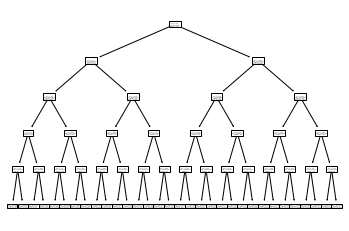

In [ ]:
from sklearn import tree
tree.plot_tree(regressor);

In [ ]:
regressor.feature_importances_

array([0.025938  , 0.10357569, 0.87048631])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Now apply the transformations to the data:
X = scaler.transform(X)
X_teste = scaler.transform(X_teste)

In [ ]:
X

array([[-1.65516851,  0.02582861,  3.1778774 ],
       [ 0.96165017,  0.35788285, -0.54910742],
       [-0.97502621,  1.0974582 ,  2.62654828],
       ...,
       [-0.43321794, -0.36659913,  0.26685967],
       [-0.67530249, -1.16654798, -0.15215046],
       [-1.02113755,  1.0974582 ,  1.30335841]])

In [ ]:
neural = MLPRegressor(random_state=42, max_iter=50000, verbose=True, hidden_layer_sizes=(4,4,4,4)) #, learning_rate_init=0.01, solver='adam')
neural

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(4, 4, 4, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [ ]:
neural.fit(X, y)

Iteration 1, loss = 57559021.84430323
Iteration 2, loss = 57544701.06896227
Iteration 3, loss = 57530774.29105674
Iteration 4, loss = 57516827.94077967
Iteration 5, loss = 57502899.12249786
Iteration 6, loss = 57488973.60343275
Iteration 7, loss = 57475065.83744806
Iteration 8, loss = 57461152.21064577
Iteration 9, loss = 57447238.34711666
Iteration 10, loss = 57433332.49916124
Iteration 11, loss = 44945249.82966134
Iteration 12, loss = 2572540.68990963
Iteration 13, loss = 1737324.97711036
Iteration 14, loss = 1657553.15621453
Iteration 15, loss = 1646798.73688347
Iteration 16, loss = 1638680.43203030
Iteration 17, loss = 1631593.61074795
Iteration 18, loss = 1625494.47532300
Iteration 19, loss = 1620527.99767556
Iteration 20, loss = 1615929.58182252
Iteration 21, loss = 1612868.20729496
Iteration 22, loss = 1610165.00818443
Iteration 23, loss = 1607580.61803804
Iteration 24, loss = 1605755.18742518
Iteration 25, loss = 1603752.22904943
Iteration 26, loss = 1601599.98073684
Iteration 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(4, 4, 4, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [ ]:
# The coefficients
print('Coefficients: \n', neural.coefs_)
print('Coefficients: \n', neural.intercepts_)
print('Loss: \n', neural.loss_)

Coefficients: 
 [array([[ 3.56918954,  2.07582185,  4.71266058,  3.8455526 ,  3.42059062],
       [ 2.71209053,  1.57502816,  3.79519922,  2.98324594,  2.67314106],
       [ 0.42545521,  5.45854184, -3.87450138,  2.50079321,  3.33101365]]), array([[-1.08193262e+000, -1.39690090e-316,  4.55450088e-316,
        -9.34809790e-001,  1.02032278e+001],
       [ 1.52843253e+001,  8.71104166e-316, -2.36504390e-315,
         5.68829944e+000,  1.04945977e-001],
       [-1.83401715e-001, -1.27953326e-315,  3.82105650e-315,
        -7.48135618e+000, -2.73735477e+000],
       [ 3.77522367e+000,  1.11879587e-315,  1.87775655e-315,
         4.68814259e+000,  4.66423545e+000],
       [ 6.63744758e-001, -8.66630614e-316,  2.63715985e-315,
         4.05210054e+000,  5.99177768e+000]]), array([[ 6.77342923e+000,  6.60354535e+000,  2.02388759e+000,
        -1.41897780e+000,  5.41705027e-316],
       [-1.80785156e-315,  2.00364163e-315,  9.96506623e-316,
         2.18891265e-315, -1.06698115e-316],
       [

In [ ]:
X_teste = [[2, 100, 99], [5, 100, 20], [6, 60, 10]]
X_teste = scaler.transform(X_teste)
y_teste = [5049, 1050, 330]

print("Training set score: %f" % neural.score(X, y))
print("Test set score: %f" % neural.score(X_teste, y_teste))

Training set score: 0.999418
Test set score: 0.940033


In [ ]:
y_teste_pred = neural.predict(X_teste)
print(y_teste_pred)

[5909.43785795  866.98176989  293.76289435]


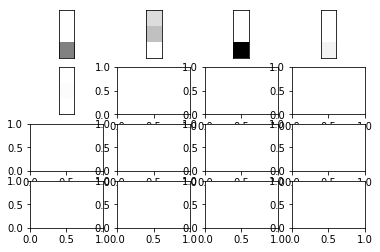

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = neural.coefs_[0].min(), neural.coefs_[0].max()
for coef, ax in zip(neural.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(3, 1), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [ ]:
print(reg.score(X, y))
y_pred = reg.predict(X)
# The coefficients
print('Coefficients: \n', reg.coef_)
print('Coefficients: \n', reg.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

ValueError: ignored

In [ ]:
a1 = 6
an = 60
n = 10
soma = (a1 + an) * (n / 2)
soma

330.0

In [ ]:
X_teste = [[2, 100, 99, 2*99, 100*99, 2/99, 100/99], [5, 100, 20, 5*20, 100*20, 5/20, 100/20], [6, 60, 10, 6*10, 60*10, 6/10, 60/10]]
y_teste = [5049, 1050, 330]
X_teste

[[2, 100, 99, 198, 9900, 0.020202020202020204, 1.0101010101010102],
 [5, 100, 20, 100, 2000, 0.25, 5.0],
 [6, 60, 10, 60, 600, 0.6, 6.0]]

In [ ]:
y_teste_pred = reg.predict(X_teste)
print(y_teste_pred)

[5049. 1050.  330.]


In [ ]:
print(y_teste)
print(y_teste_pred)

[5049, 1050, 330]
[5049. 1050.  330.]


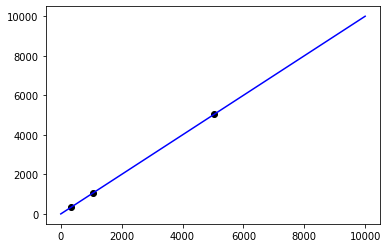

In [ ]:
plt.scatter(y_teste, y_teste_pred,  color='black')
plt.plot(range(1,10001), range(1,10001), color='blue')
plt.show()

In [ ]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

# Plot outputs
plt.scatter(X[['a1']], y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [-5.04997126e-14  8.95949981e-14 -3.06022568e-14  5.00000000e-01
  5.00000000e-01]
Mean squared error: 0.00
Coefficient of determination: 1.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


IndexError: ignored

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.051e+31
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:39:27   Log-Likelihood:                 8992.7
No. Observations:                 379   AIC:                        -1.797e+04
Df Residuals:                     371   BIC:                        -1.794e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.308e-13   3.17e-12      0.294      0.7